In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Importing the dataset
data = pd.read_csv('C:/Users/jitender thakur/Downloads/Social_Network_Ads.csv')

In [25]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
#dropping  column
data.drop(['User ID'], axis = 1, inplace = True)

In [28]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [29]:
#onehot encodding SEX column
d= pd.get_dummies(data['Gender'])
data.drop(['Gender'], axis = 1, inplace = True)

data = pd.concat([data, d], axis = 1)
data.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [30]:
X = data.drop(['Purchased'],axis=1)
y = data['Purchased']

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 666)


# Bagging 

### applying Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)


In [33]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

<AxesSubplot:>

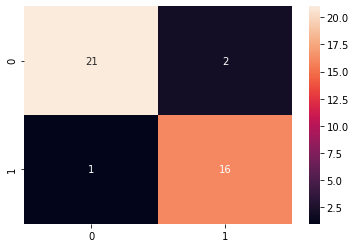

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
cm= confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [35]:
print("Accuracy= {}, Recall= {}, Precision= {}".format(accuracy,recall,precision))

Accuracy= 0.925, Recall= 0.9411764705882353, Precision= 0.8888888888888888


# # Fitting XGBoost Classifier 

In [36]:
# Fitting XGBoost Classifier to the Training Set
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

K:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

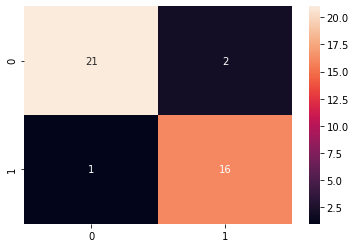

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
cm_boost= confusion_matrix(y_test,y_pred)
accuracy_boost=accuracy_score(y_test,y_pred)
recall_boost=recall_score(y_test,y_pred)
precision_boost=precision_score(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [38]:
print("Accuracy= {}, Recall= {}, Precision= {}".format(accuracy_boost,recall_boost,precision_boost))

Accuracy= 0.925, Recall= 0.9411764705882353, Precision= 0.8888888888888888
